# Premis: More skewness more convexity and more crowdness

Heard idea from Quest Partners at quant conference.  The idea is:

* We are paid to hold convexity
* The more convex a market is the more crowded (perhaps leveraged people are in that trade)
* You can measure convexity by skewness

Underlying the idea is that performance (SR) and skewness have an inveerse relationship. Investors tend to prefer higher Sharpe strategies but get more negative skew strategies with it.  He was thinking HF strategies but this analysis is based on 120+ futures contracts with monthly data.

In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import seaborn as sns
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [6]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df

def load_price():
    data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
    price = clean_up_columns(data)
    qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
    df=pd.DataFrame()
    df=price.copy()
    for x in qd.columns:
        df[x]=qd[x]
    return df

In [7]:
px=load_price()

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  # This is added back by InteractiveShellApp.init_path()


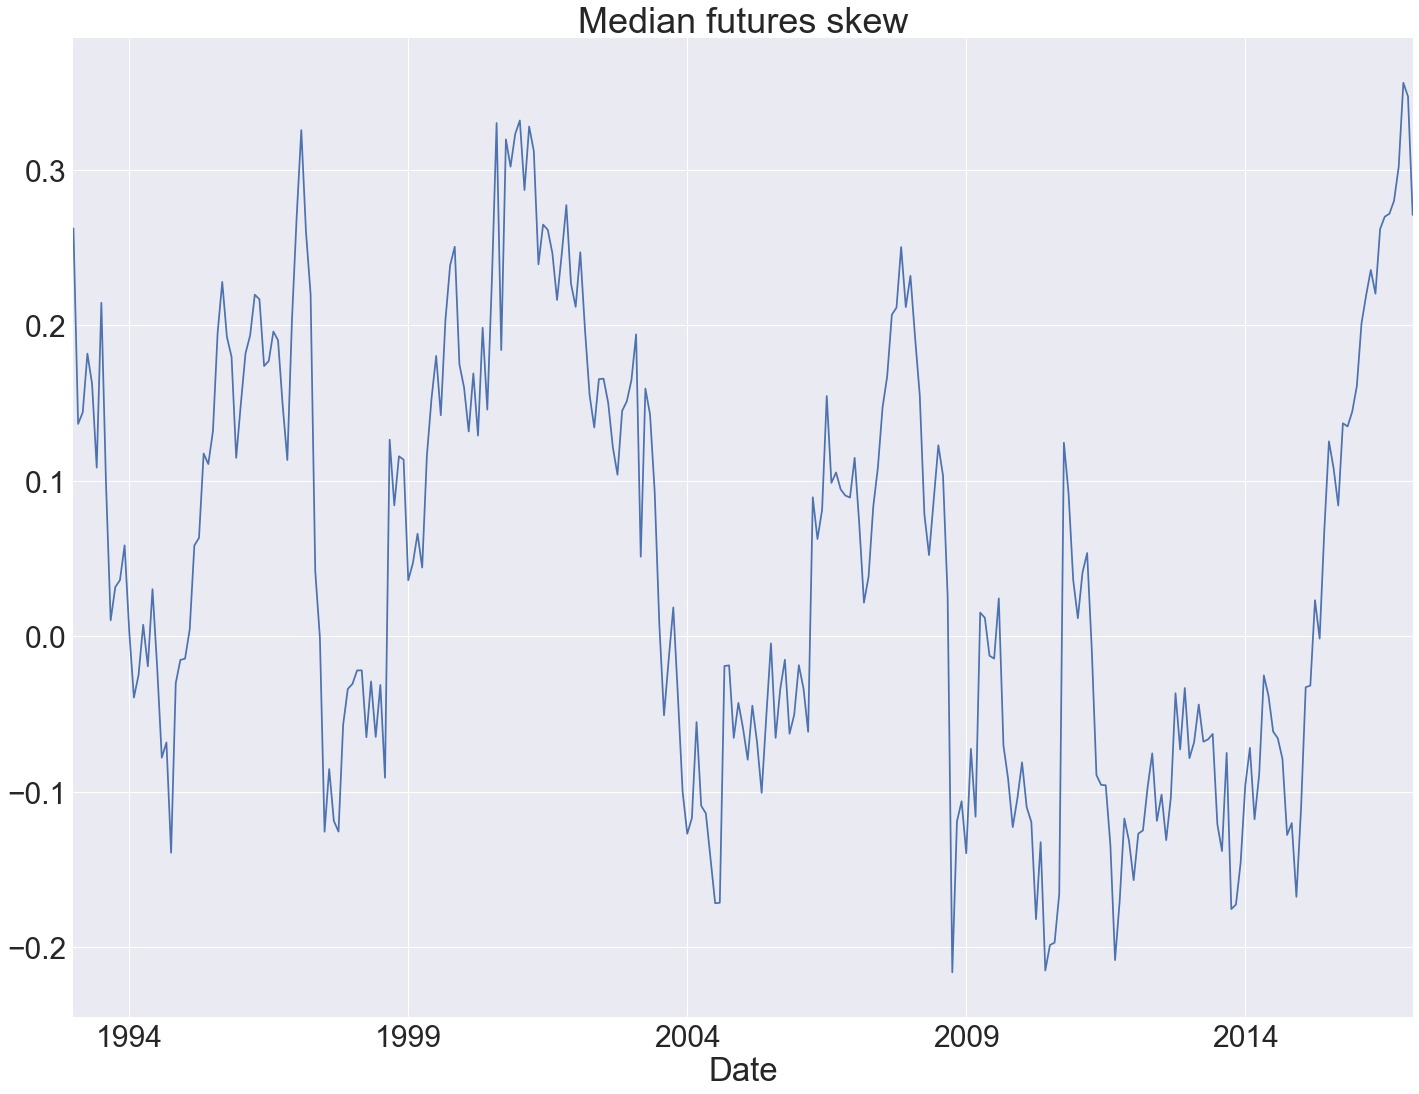

In [25]:
pd.DataFrame.rolling(px.resample(rule='m').last().pct_change(),24).skew()['1993':].median(axis=1).plot(title='Median futures skew')

In [26]:
x=pd.DataFrame.rolling(px.resample(rule='m').last().pct_change(),24).skew()

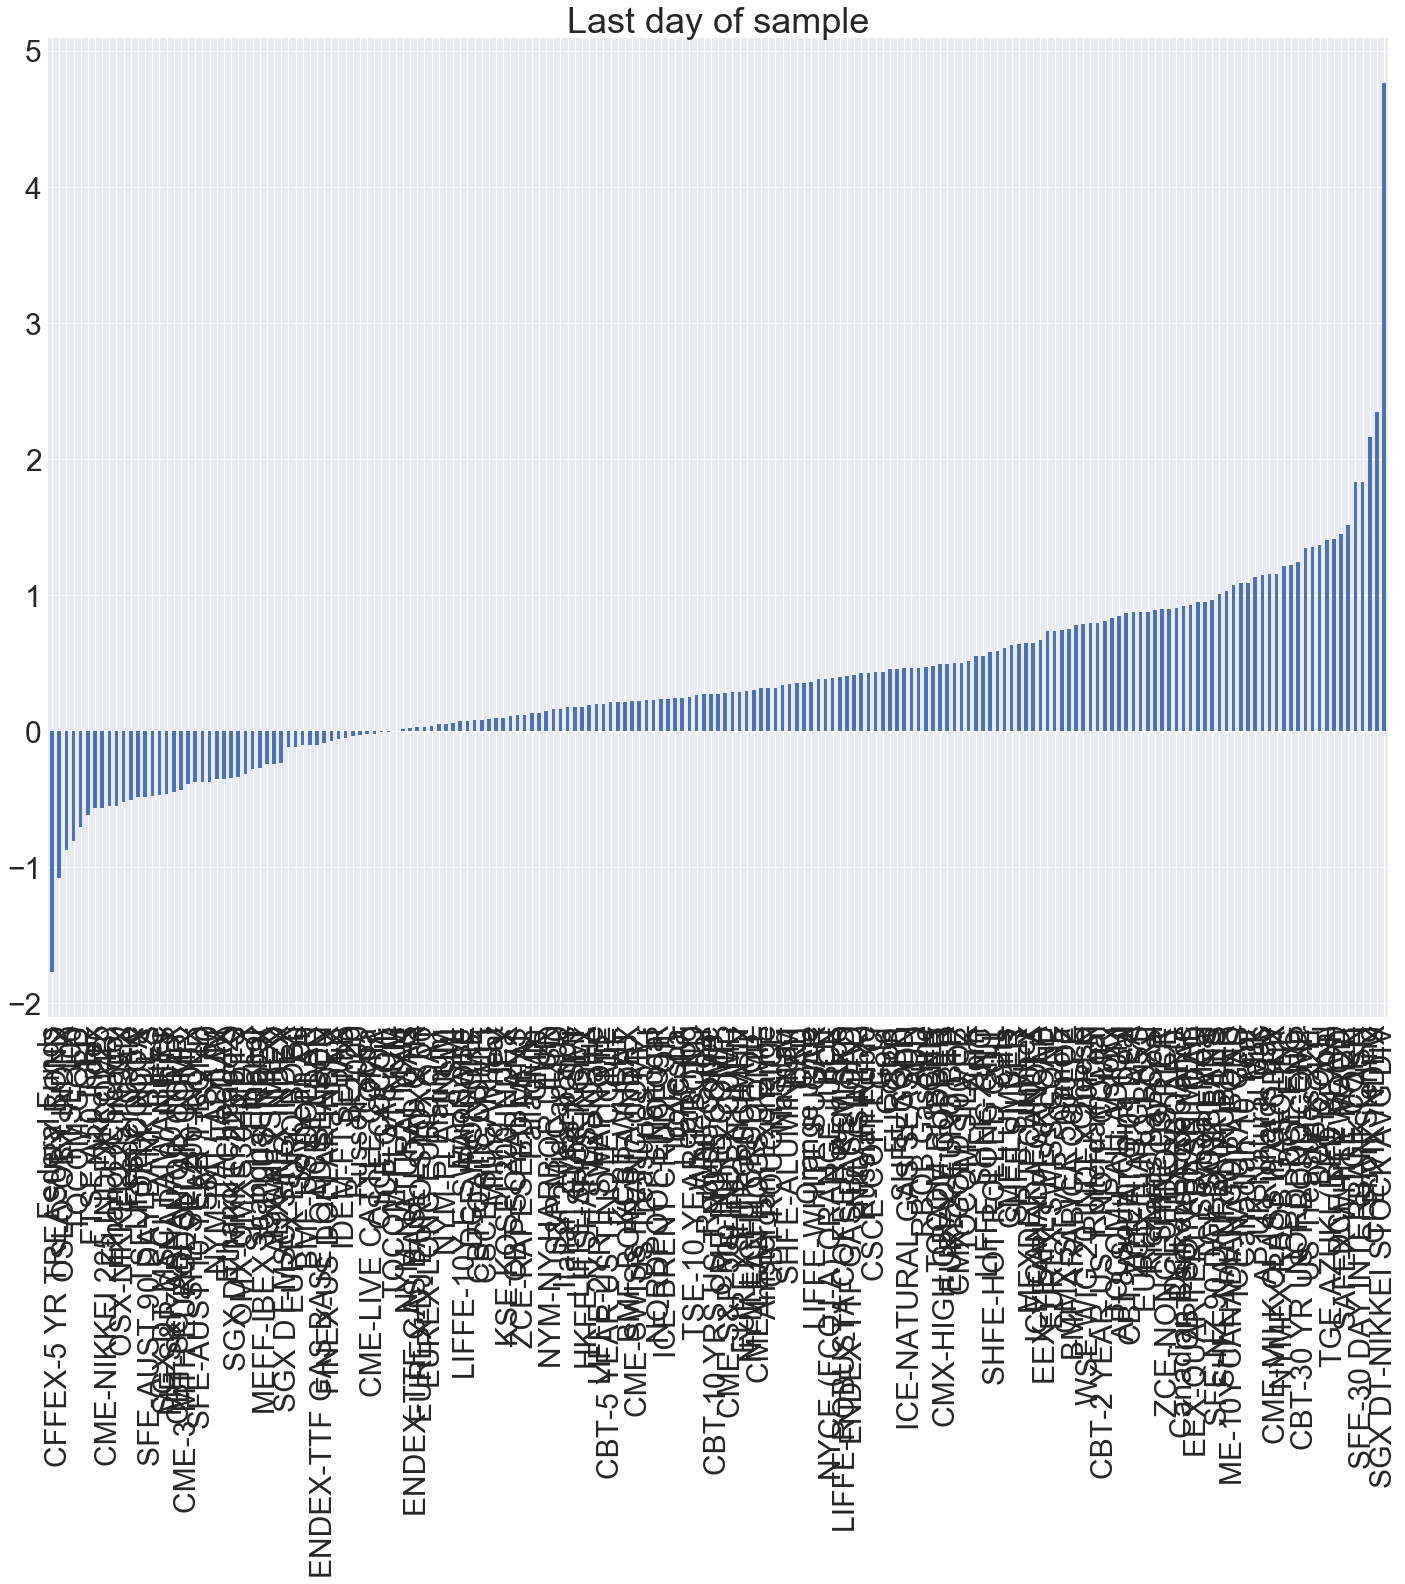

In [30]:
x.iloc[-1].dropna().sort_values().plot(kind='bar',title='Last day of sample')

In [31]:
y=x.iloc[-1]

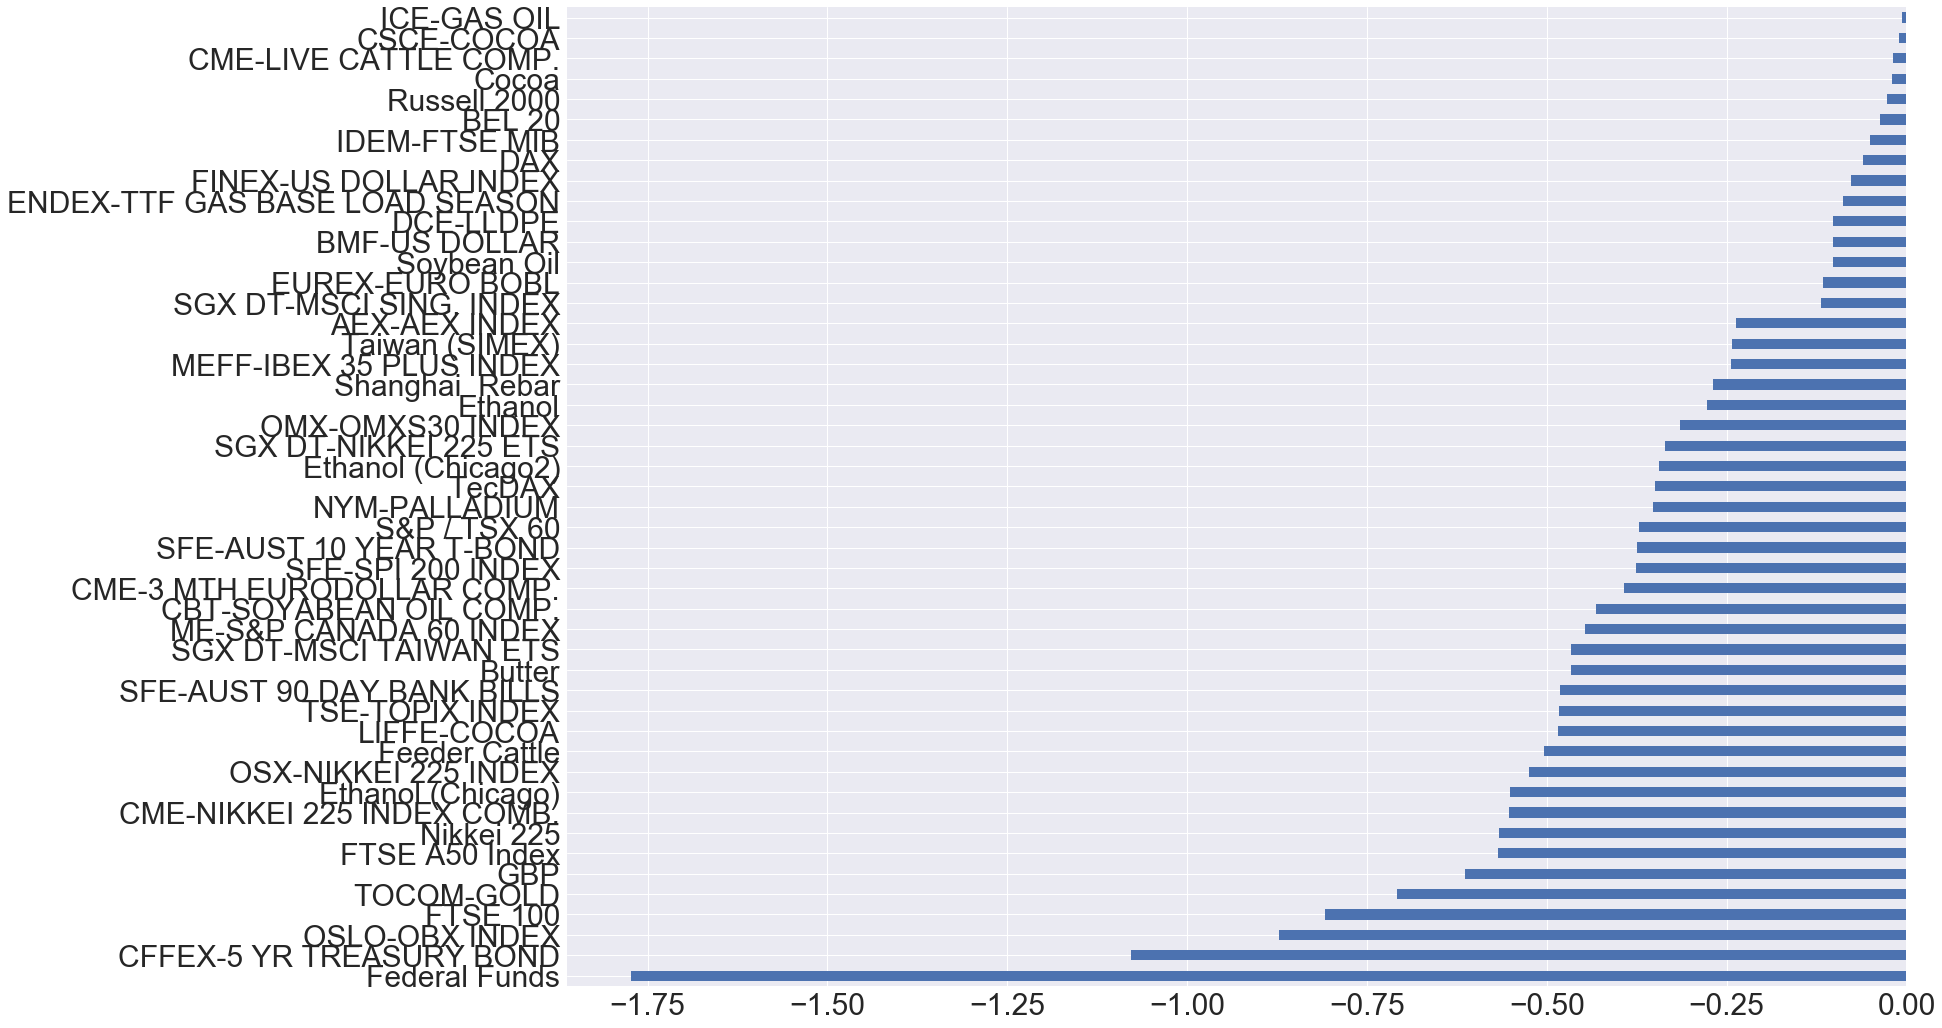

In [35]:
y[y<0].sort_values().plot(kind='barh')

# Part 2: Relation between skew and performance

In [36]:
def calc_Sharpe(pnl,N=12):
    return np.sqrt(N) * pnl.mean() / pnl.std()

In [40]:
df = pd.DataFrame()
df['Skew']=px.resample(rule='m').last().pct_change()['2000':].skew() 
df['SR']=calc_Sharpe(px.resample(rule='m').last().pct_change()['2000':])

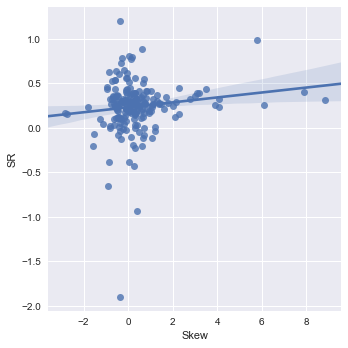

In [46]:
sns.set(font_scale=1)
sns.lmplot(x='Skew',y='SR',data=df)

# Results

* Should be a positive relationship not negative
* Could be pulled by the outliers?
* Also this is a full sample measure, perhaps these relationships are time varying